In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vancouver = pd.read_csv("crime.csv")

In [3]:
vancouver.drop(['MINUTE'], axis=1, inplace=True)
vancouver['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

In [4]:
vancouver['DATE'] = pd.to_datetime({'year':vancouver['YEAR'], 'month':vancouver['MONTH'], 'day':vancouver['DAY']})
vancouver['Day of Week'] = vancouver['DATE'].dt.dayofweek

In [5]:
vancouver.index = pd.DatetimeIndex(vancouver['DATE'])

In [6]:
vancouver = vancouver[vancouver['DATE'] < '2017-01-01']
vancouver.drop(['DATE'], axis=1, inplace=True)

In [7]:
vancouver.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,Day of Week
DATE,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,0
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,6
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,5


In [8]:
vancouver['TYPE'].value_counts()

Theft from Vehicle                                        166738
Mischief                                                   67832
Break and Enter Residential/Other                          59558
Offence Against a Person                                   52537
Other Theft                                                49301
Theft of Vehicle                                           37663
Break and Enter Commercial                                 32734
Theft of Bicycle                                           24744
Vehicle Collision or Pedestrian Struck (with Injury)       21230
Vehicle Collision or Pedestrian Struck (with Fatality)       249
Homicide                                                     209
Name: TYPE, dtype: int64

In [9]:
crimes_year = vancouver.groupby(['YEAR']).count()['TYPE']

Text(0.5, 0, 'Year')

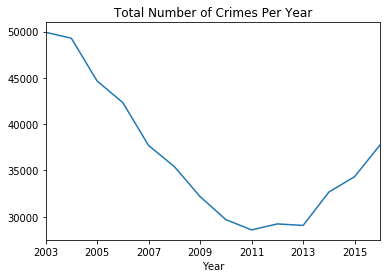

In [10]:
crimes_year.plot()
plt.title("Total Number of Crimes Per Year")
plt.xticks(np.arange(2003,2017, step=2))
plt.xlabel("Year")

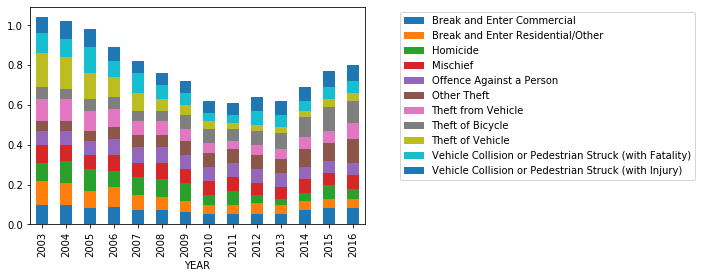

In [11]:
crime_type_by_year = vancouver.groupby(["TYPE", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("TYPE")
w = vancouver.groupby(['TYPE']).count()
div_vec = w['YEAR'] 
crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
crime_type_prop.stack()

crime_type_prop.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(2,1))


#crime_type_by_year_df = crime_type_by_year.unstack()
#w = vancouver.groupby(['YEAR']).count()
#div_vec = w['TYPE'] 
#crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
#crime_type_prop.plot(kind='bar', stacked=True)
#vancouver['TYPE'].value_counts()






#can't quite get the code right, want it to be like the last midterm question, but it is a cool way to represent the line graph
#shown above

In [46]:
mischief = vancouver[vancouver['TYPE'] == 'Mischief']
mischief_days = mischief.groupby(["YEAR", "MONTH", "DAY"]).count()['TYPE']

days = vancouver.groupby(["DATE"]).count()['TYPE']
types = vancouver.groupby(["TYPE", "DATE"]).count()

break_enter_comm = vancouver[vancouver['TYPE'] == 'Break and Enter Commercial']
break_comm_days = break_enter_comm.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

break_enter_res = vancouver[vancouver['TYPE'] == 'Break and Enter Residential/Other']
break_res_days = break_enter_res.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

homicide = vancouver[vancouver['TYPE'] == 'Homicide']
homicide_days = homicide.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

person_off = vancouver[vancouver['TYPE'] == 'Offence Against a Person']
person_off_days = person_off.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

other_theft = vancouver[vancouver['TYPE'] == 'Other Theft']
other_theft_days = other_theft.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_ve = vancouver[vancouver['TYPE'] == 'Theft from Vehicle']
theft_ve_days = theft_ve.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_bi = vancouver[vancouver['TYPE'] == 'Theft of Bicycle']
theft_bi_days = theft_bi.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_car = vancouver[vancouver['TYPE'] == 'Theft of Vehicle']
theft_car_days = theft_car.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

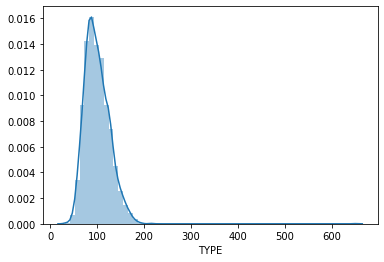

In [25]:
import seaborn as sns
sns.distplot(days, bins=60);

MASSIVE OUTLIER, 600+ CRIMES IN A SINGLE DAY, LET'S SEE WHAT DAY IT WAS

In [68]:
heavy_crime_days = days[days >= 300]
print(heavy_crime_days)

DATE
2011-06-15    649
Name: TYPE, dtype: int64


June 15th, 2011 was the day of the famous Stanley Cup riots, where angry Canucks fans rioted in the streets after allegedly 
throwing the Stanley Cup finals. These riots created outliers in people arrested for Mischief, as well as Breaking and Entering 
into Commercial Areas, causing an overall massive outlier in the city's crimes per day total (more than 400 more crimes than the next-closest day).

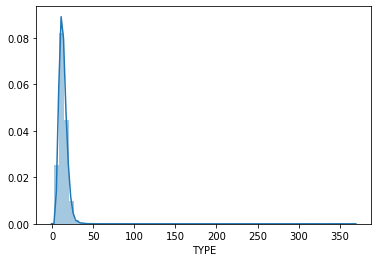

In [30]:
sns.distplot(mischief_days, bins=60);

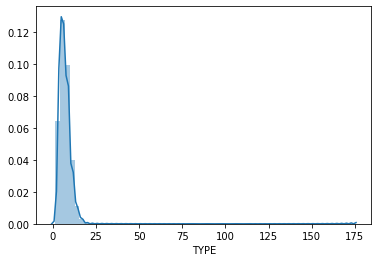

In [29]:
sns.distplot(break_comm_days, bins=60);

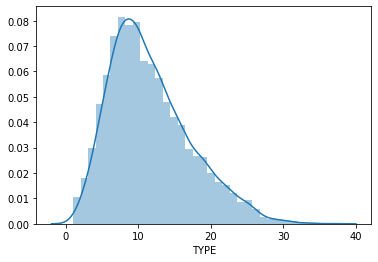

In [64]:
sns.distplot(break_res_days, bins=35);

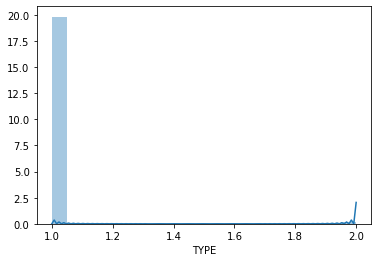

In [69]:
sns.distplot(homicide_days, bins=20);  #wtf?

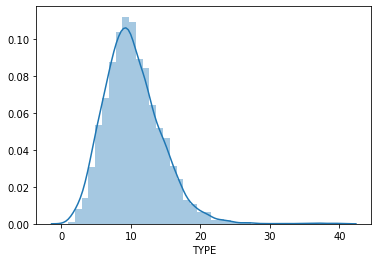

In [70]:
sns.distplot(person_off_days, bins=40);

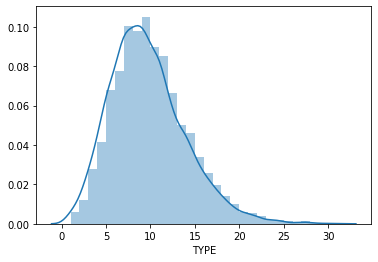

In [71]:
sns.distplot(other_theft_days, bins=30);

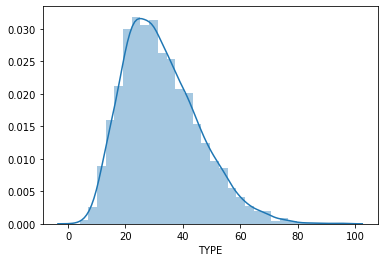

In [72]:
sns.distplot(theft_ve_days, bins=30);

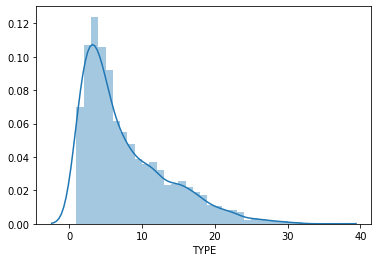

In [73]:
sns.distplot(theft_car_days, bins=35);

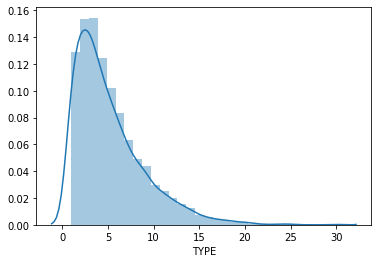

In [74]:
sns.distplot(theft_bi_days, bins=30);

Most Crime per day totals seem to be Normally distributed, except for the Homicide chart (wtf), and the Car and Bike theft
charts, which have more at 0 then kinda flare outward (forget the name of the dist)

In [ ]:
Individual Outlier Analysis: Unfinished but will be soon, starting with Mischief and B&E Commercial Crimes (to talk about riots)

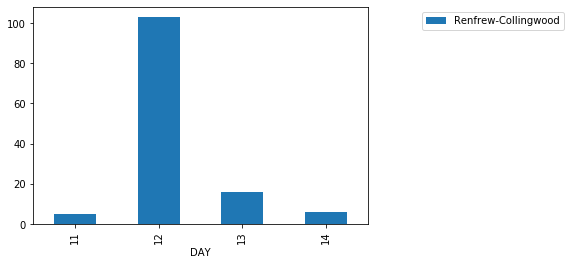

In [65]:
rc = vancouver[vancouver['YEAR'] == 2008]
rc1 = rc[rc['NEIGHBOURHOOD'] == 'Renfrew-Collingwood']
rc2 = rc1[rc1['MONTH'] == 3]
rc3 = rc2[rc2['DAY'].isin([10,11,12,13,14])]
rc4 = rc3[rc3['TYPE'] == 'Mischief']
mischief_in_range = rc4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_in_range.unstack().fillna(0).plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1));

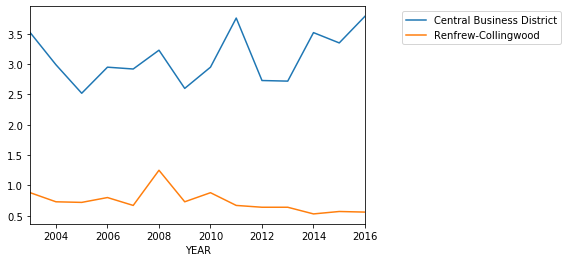

In [55]:
mischief = vancouver[vancouver['TYPE'] == 'Mischief']
mischief_days_by_hood = mischief.groupby(['NEIGHBOURHOOD', 'YEAR']).count()
mischief_per_day = mischief_days_by_hood.unstack('NEIGHBOURHOOD')['TYPE'].div(365.25).round(2)
mischief_per_day[['Central Business District', 'Renfrew-Collingwood']].plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1));

